In [3]:
#2a)
#import packages
import numpy as np
import seaborn as sns
sns.set()

In [4]:
#define a function for Hermite polynomials
def H(n,x):
    h = np.empty(n+1)
    if n>=0:
        h[0] = 1
        if n>=1:
            h[1] = 2*x
        if n>=2:
            for m in range(2,n+1):
                h[m] = 2*x*h[m-1] - 2*(m-1)*h[m-2]
            
    else:
        h[n] = -1
        print('Error, x<0')
    return h[n]

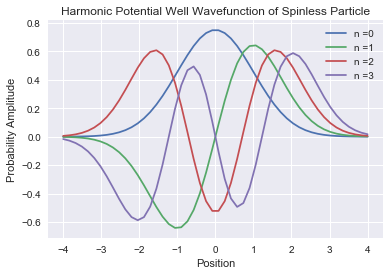

In [5]:
#define the wavefunction for the spinless point particle in a quadratic potential well
from scipy.special import factorial
def wavefunc(n,x):
    L = len(x)
    psi = np.empty(L)
    for l in range(L):
        psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*H(n,x[l])
    return psi

x = np.linspace(-4,4)
N = np.arange(0,4)
#for each value of N, plot the wavefunction on the interval [-4,4]
import matplotlib.pyplot as plt

plt.figure
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
for i in range(len(N)):
    n = N[i]
    plt.plot(x, wavefunc(n,x),label = 'n ='+str(n))
    
plt.legend()


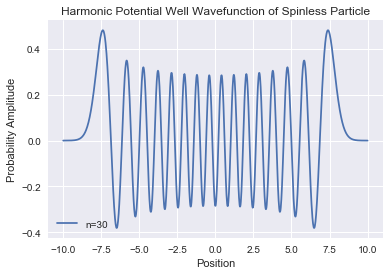

In [6]:
#2b)
x1 = np.linspace(-10,10, 1000)
n1 = 30

plt.figure
plt.plot(x1, wavefunc(n1, x1), label = 'n=30')
plt.title('Harmonic Potential Well Wavefunction of Spinless Particle')
plt.xlabel('Position')
plt.ylabel('Probability Amplitude')
plt.legend()

In [7]:
#2c)
def wavefunc_derivative(n,x):
    L = len(x)
    psi = np.empty(L)
    for l in range(L):
        if n>0:
            psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 2*n*H(n-1,x[l]))
        else:
            psi[l] = (1/np.sqrt((2**n)*factorial(n)*np.sqrt(np.pi)))*np.exp(-(x[l]**2)/2)*(-x[l]*H(n,x[l]) + 0)
    return psi
def get_RMSposition_and_RMSmomentum(n):
    '''
    A function to calculate the RMS position and momentum and total energy of a spinless particle in a harmonic potential 
    well for the nth eigenstate of the sytem (requires wavefunc and wavefunc_derivative loaded into memory, respectively 
    being the functions for the wavefunction and its derivate for a given x and n).
    INPUT:
    n : the index of the eigenstate
    OUTPUT:
    RMSx : the root-mean squared position of the particle
    RMSp : the root-mean square momentum of the particle
    Energy : the total energy of the particle
    '''
    from gaussxw import gaussxw

    Num = 100
    a = -np.pi/2
    b = np.pi/2

    xG, wG = gaussxw(Num)

    zG = np.arctan(xG)
    
    zp = 0.5*(b-a)*zG/max(zG) + 0.5*(b+a)
    wp = 0.5*(b-a)*wG
    
    def F1(n, x):
        return (np.tan(x)* wavefunc(n, np.array([np.tan(x)]))/np.cos(x))**2
    def F2(n, x):
        return (wavefunc_derivative(n, np.array([np.tan(x)]))/np.cos(x))**2

    RMSx = 0.0
    for k in range(Num):
        RMSx += wp[k]*F1(n, zp[k])

    RMSp = 0.0
    for k in range(Num):
        RMSp += wp[k]*F2(n, zp[k])

    Energy = (RMSx + RMSp)/2
    
    uncertainty_x = np.sqrt(RMSx)
    uncertainty_p = np.sqrt(RMSp)
    
    return RMSx, RMSp, uncertainty_x, uncertainty_p, Energy

    

In [8]:
RMSx, RMSp, u_x, u_p, Energy = get_RMSposition_and_RMSmomentum(5)
print(u_x)

0.7852550062941238
[2.53567243]


Text(0,0.5,'Energy (arbitrary units)')

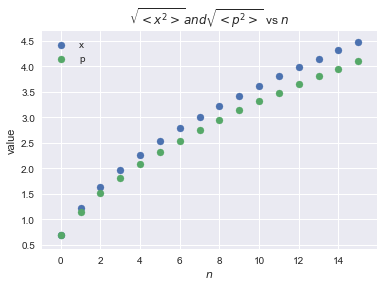

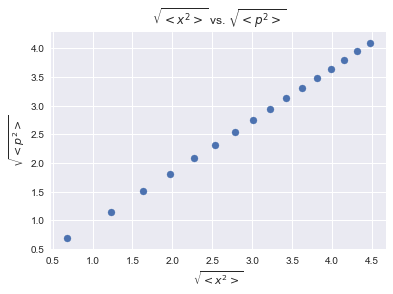

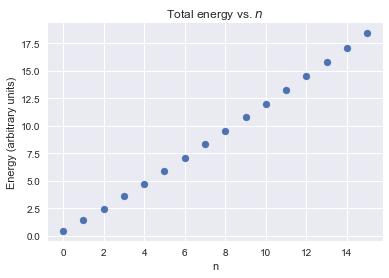

In [7]:
#plot <x^2>, <p^2> for n=0,1,2,...,15
inds = np.arange(0,16)
unc_x = np.empty(len(inds))
unc_p = np.empty(len(inds))
Energy = np.empty(len(inds))

for i in inds:
    RMSx, RMSp, u_x, u_p, the_Energy = get_RMSposition_and_RMSmomentum(i)
    unc_x[i] = u_x
    unc_p[i] = u_p
    Energy[i] = the_Energy

plt.figure()
plt.scatter(inds, unc_x, label = 'x')
plt.scatter(inds, unc_p, label = 'p')
plt.legend()
plt.xlabel('$n$')
plt.ylabel('value')
plt.title('$\sqrt{<x^2>} and \sqrt{<p^2>}$ vs $n$')

plt.figure()
plt.scatter(unc_x, unc_p)
plt.title('$\sqrt{<x^2>}$ vs. $\sqrt{<p^2>}$')
plt.xlabel('$\sqrt{<x^2>}$')
plt.ylabel('$\sqrt{<p^2>}$')

plt.figure()
plt.scatter(inds, Energy)
plt.title('Total energy vs. $n$')
plt.xlabel('n')
plt.ylabel('Energy (arbitrary units)')